In [600]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OrdinalEncoder, StandardScaler,LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from scipy.stats import zscore
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV


In [601]:
#importing world Happiness dataset
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/World%20Happiness/happiness_score_dataset.csv')

In [602]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


This is the  world happiness dataset we have imported, which contain 158 rows and 12 columns in total

In [603]:
df.head(20)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


This are the top 20 rows and columns of the imported dataset.

In [604]:

df.sample(10)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
138,Congo (Brazzaville),Sub-Saharan Africa,139,3.989,0.06682,0.67866,0.66290,0.31051,0.41466,0.11686,0.12388,1.68135
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
151,Burkina Faso,Sub-Saharan Africa,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
107,Palestinian Territories,Middle East and Northern Africa,108,4.715,0.04394,0.59867,0.92558,0.66015,0.24499,0.12905,0.11251,2.04384
21,Oman,Middle East and Northern Africa,22,6.853,0.05335,1.36011,1.08182,0.76276,0.63274,0.32524,0.21542,2.47489
75,Turkey,Middle East and Northern Africa,76,5.332,0.03864,1.06098,0.94632,0.73172,0.22815,0.15746,0.12253,2.08528
33,Thailand,Southeastern Asia,34,6.455,0.03557,0.96690,1.26504,0.73850,0.55664,0.03187,0.57630,2.31945
30,Czech Republic,Central and Eastern Europe,31,6.505,0.04168,1.17898,1.20643,0.84483,0.46364,0.02652,0.10686,2.67782
90,Somaliland region,Sub-Saharan Africa,91,5.057,0.06161,0.18847,0.95152,0.43873,0.46582,0.39928,0.50318,2.11032


This are the random rows and columns from the dataset.

In [605]:
df.columns.tolist()

['Country',
 'Region',
 'Happiness Rank',
 'Happiness Score',
 'Standard Error',
 'Economy (GDP per Capita)',
 'Family',
 'Health (Life Expectancy)',
 'Freedom',
 'Trust (Government Corruption)',
 'Generosity',
 'Dystopia Residual']

These are the names of all the 12 columns present in the dataset.

In [606]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

This shows the dtype of the data. There are 9 float and 2 object dtype.
There are no null values.

In [607]:
df.count()

Country                          158
Region                           158
Happiness Rank                   158
Happiness Score                  158
Standard Error                   158
Economy (GDP per Capita)         158
Family                           158
Health (Life Expectancy)         158
Freedom                          158
Trust (Government Corruption)    158
Generosity                       158
Dystopia Residual                158
dtype: int64

this shows the total count of all columns and there are no missing values.

In [608]:
df.nunique().to_frame('No of unique values')

,No of unique values
Country,158
Region,10
Happiness Rank,157
Happiness Score,157
Standard Error,153
Economy (GDP per Capita),158
Family,158
Health (Life Expectancy),157
Freedom,158
Trust (Government Corruption),157


This are the unique values of the of all the columns.

In [609]:
df.isnull().sum().sum()

0

there are 0 null values.

<Axes: >

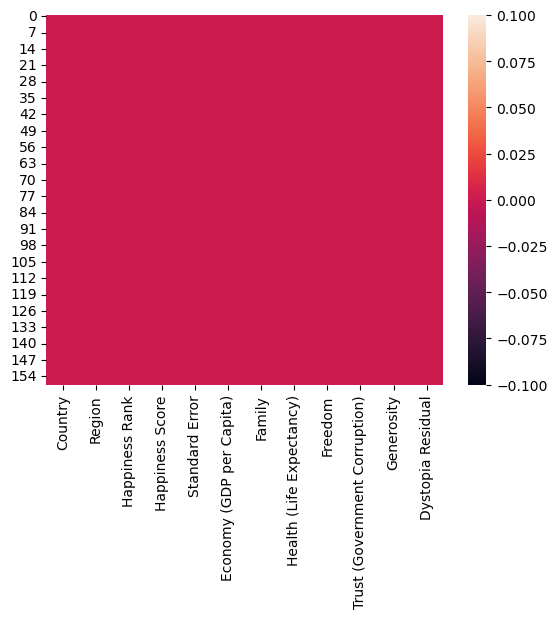

In [610]:
sns.heatmap(df.isnull())

This is the heatmap showing that there are no null values.

In [611]:
#changing categorical data into numerical data
from sklearn.preprocessing import LabelEncoder

number=LabelEncoder()
df['Country']=number.fit_transform(df['Country'].astype('str'))
df['Region']=number.fit_transform(df['Region'].astype('str'))

In [612]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    int32  
 1   Region                         158 non-null    int32  
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int32(2), int64(1)
memory usage: 13

We have change the column 'country'  and 'region' categorical data into numerical data.

In [613]:
df.describe()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,78.500000,5.120253,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754781,2.993321,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,0.000000,0.000000,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,39.250000,3.000000,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,78.500000,4.500000,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,117.750000,8.000000,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,157.000000,9.000000,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


1. This statistical data shows the that there are no missing values as the count of columns are same.
2. mean is greater than median(50%) in some of the columns.
3. There are difference between the 75% and max which means there are outliers present in some of the columns.

<Axes: >

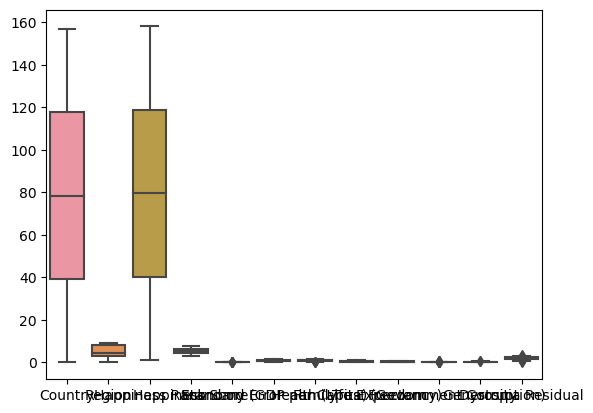

In [614]:
#dropping of duplicates values
df.drop_duplicates(inplace=True)
sns.boxplot(df)

Checking for any duplicate values present in the dataset and dropping them.

In [615]:
df.duplicated().sum()

0

there are no duplicate values

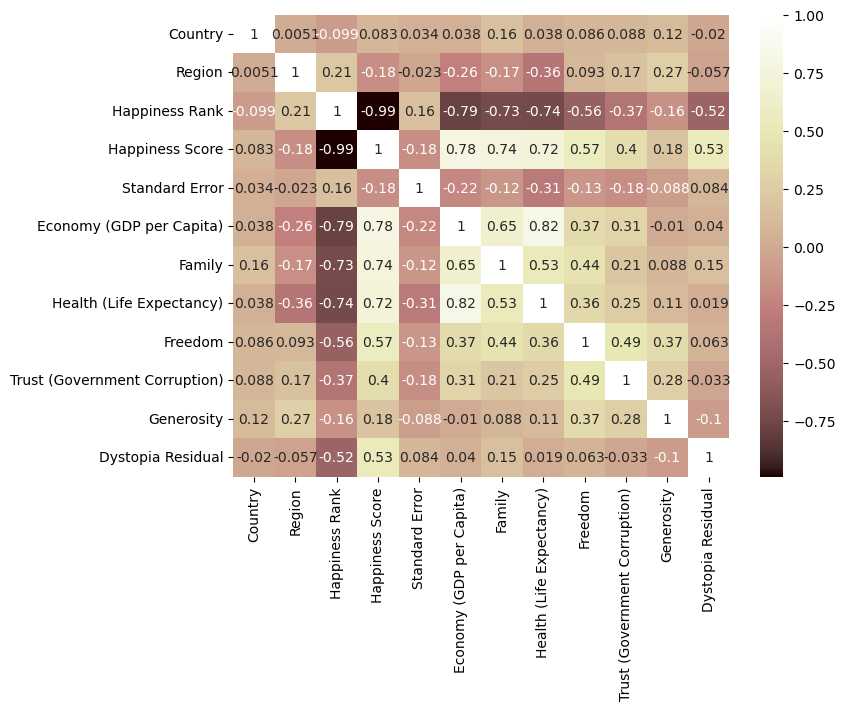

In [616]:
#checking of correlation with the heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),cmap='pink',annot=True)
plt.show()

This shows the correlation between the Happiness score and other columns.
Happiness Score is negatively correlated with happiness rank, so we can drop happiness rank.
Economy','Family' and 'Health' are highly correlated with Happiness Score.
Health is negatively correlated with region and Happiness Rank.

In [617]:
df.drop('Happiness Rank',axis=1,inplace=True)


In [618]:
#Top score of happiness score
df['Happiness Score'].max()

7.587

In [619]:
#bottom score of Happiness Score
df['Happiness Score'].min()

2.839

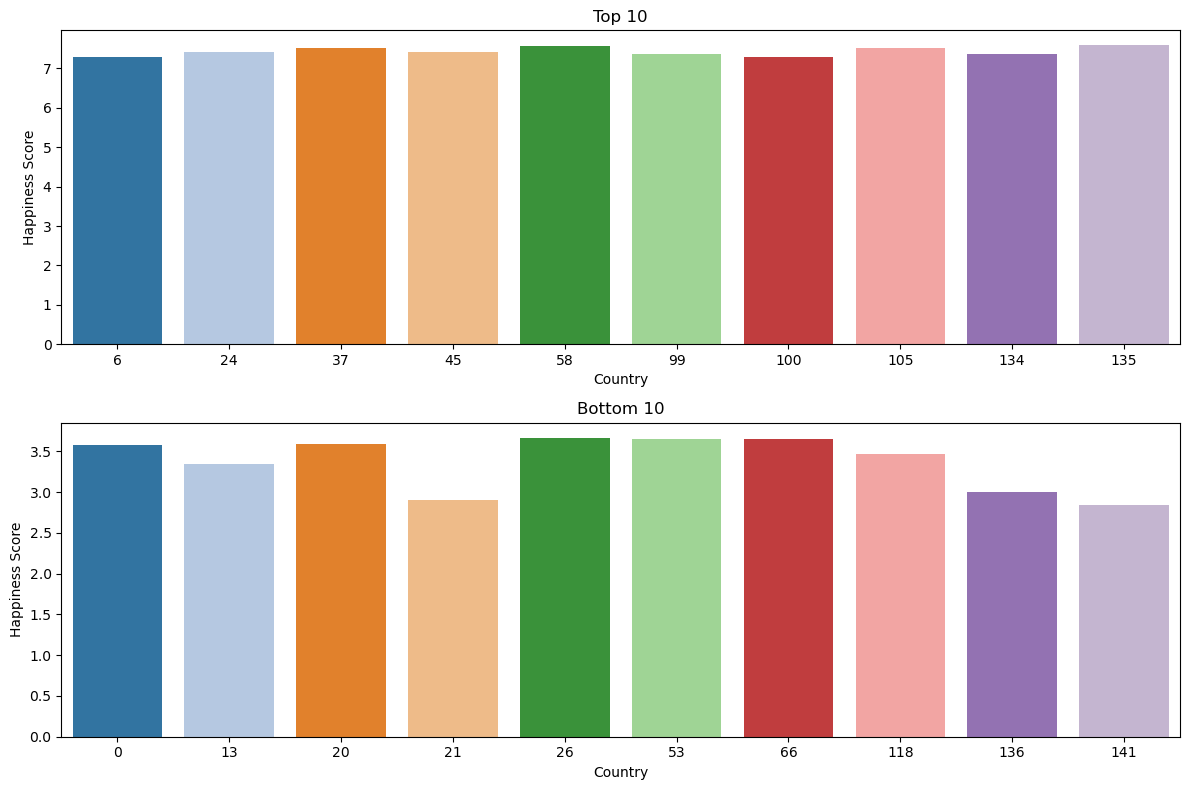

In [620]:
#checking top and bottom happiness score
top_10=df.sort_values('Happiness Score',ascending=False)
bottom_10=df.sort_values('Happiness Score',ascending=True)
fig,ax=plt.subplots(2,1,figsize=(12,8))

sns.barplot(top_10.iloc[:10],y='Happiness Score',x='Country',palette='tab20',ax=ax[0])
ax[0].set_title('Top 10')

sns.barplot(bottom_10.iloc[:10],y='Happiness Score',x='Country',palette='tab20',ax=ax[1])
ax[1].set_title('Bottom 10')
fig.tight_layout()
fig.show()


These are the top 10 happiness score of the country.
and are bottom 10 happiness score of the country.

In [621]:
#checking correlation
df.corr()

,Country,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,1.000000,0.005092,0.083380,0.033879,0.037808,0.159416,0.037829,0.085684,0.088155,0.118085,-0.019778
Region,0.005092,1.000000,-0.176791,-0.022600,-0.260139,-0.168533,-0.357508,0.092567,0.165040,0.273557,-0.057276
Happiness Score,0.083380,-0.176791,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.033879,-0.022600,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),0.037808,-0.260139,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,0.159416,-0.168533,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),0.037829,-0.357508,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,0.085684,0.092567,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),0.088155,0.165040,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,0.118085,0.273557,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301


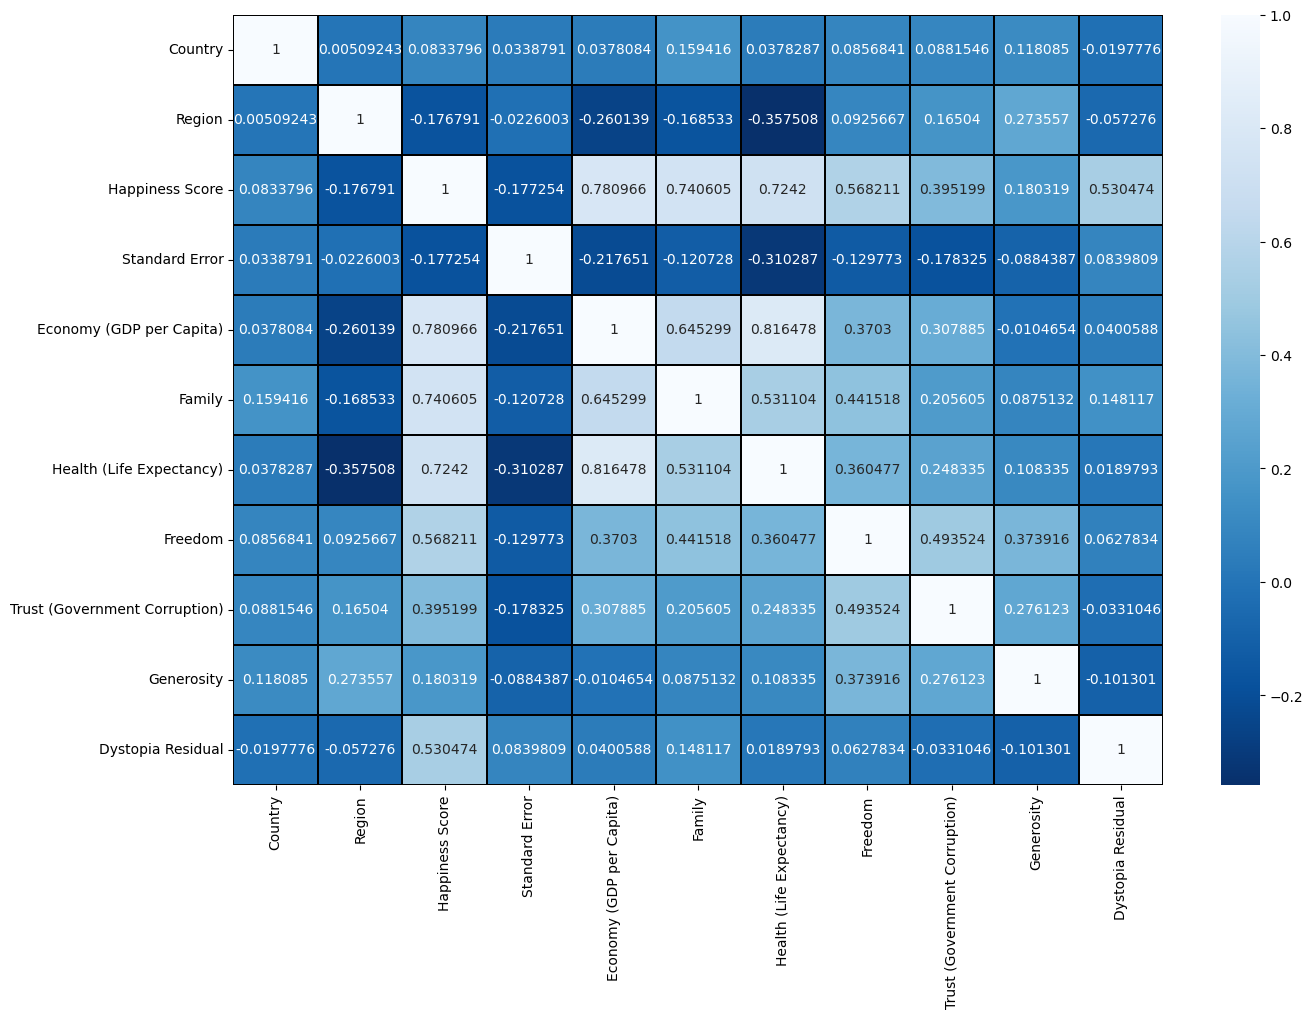

In [622]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),linewidths=0.1,fmt='1g',linecolor='black',annot=True,cmap='Blues_r')
plt.yticks(rotation=0);
plt.show()

correlation chart after dropping happiness rank column.

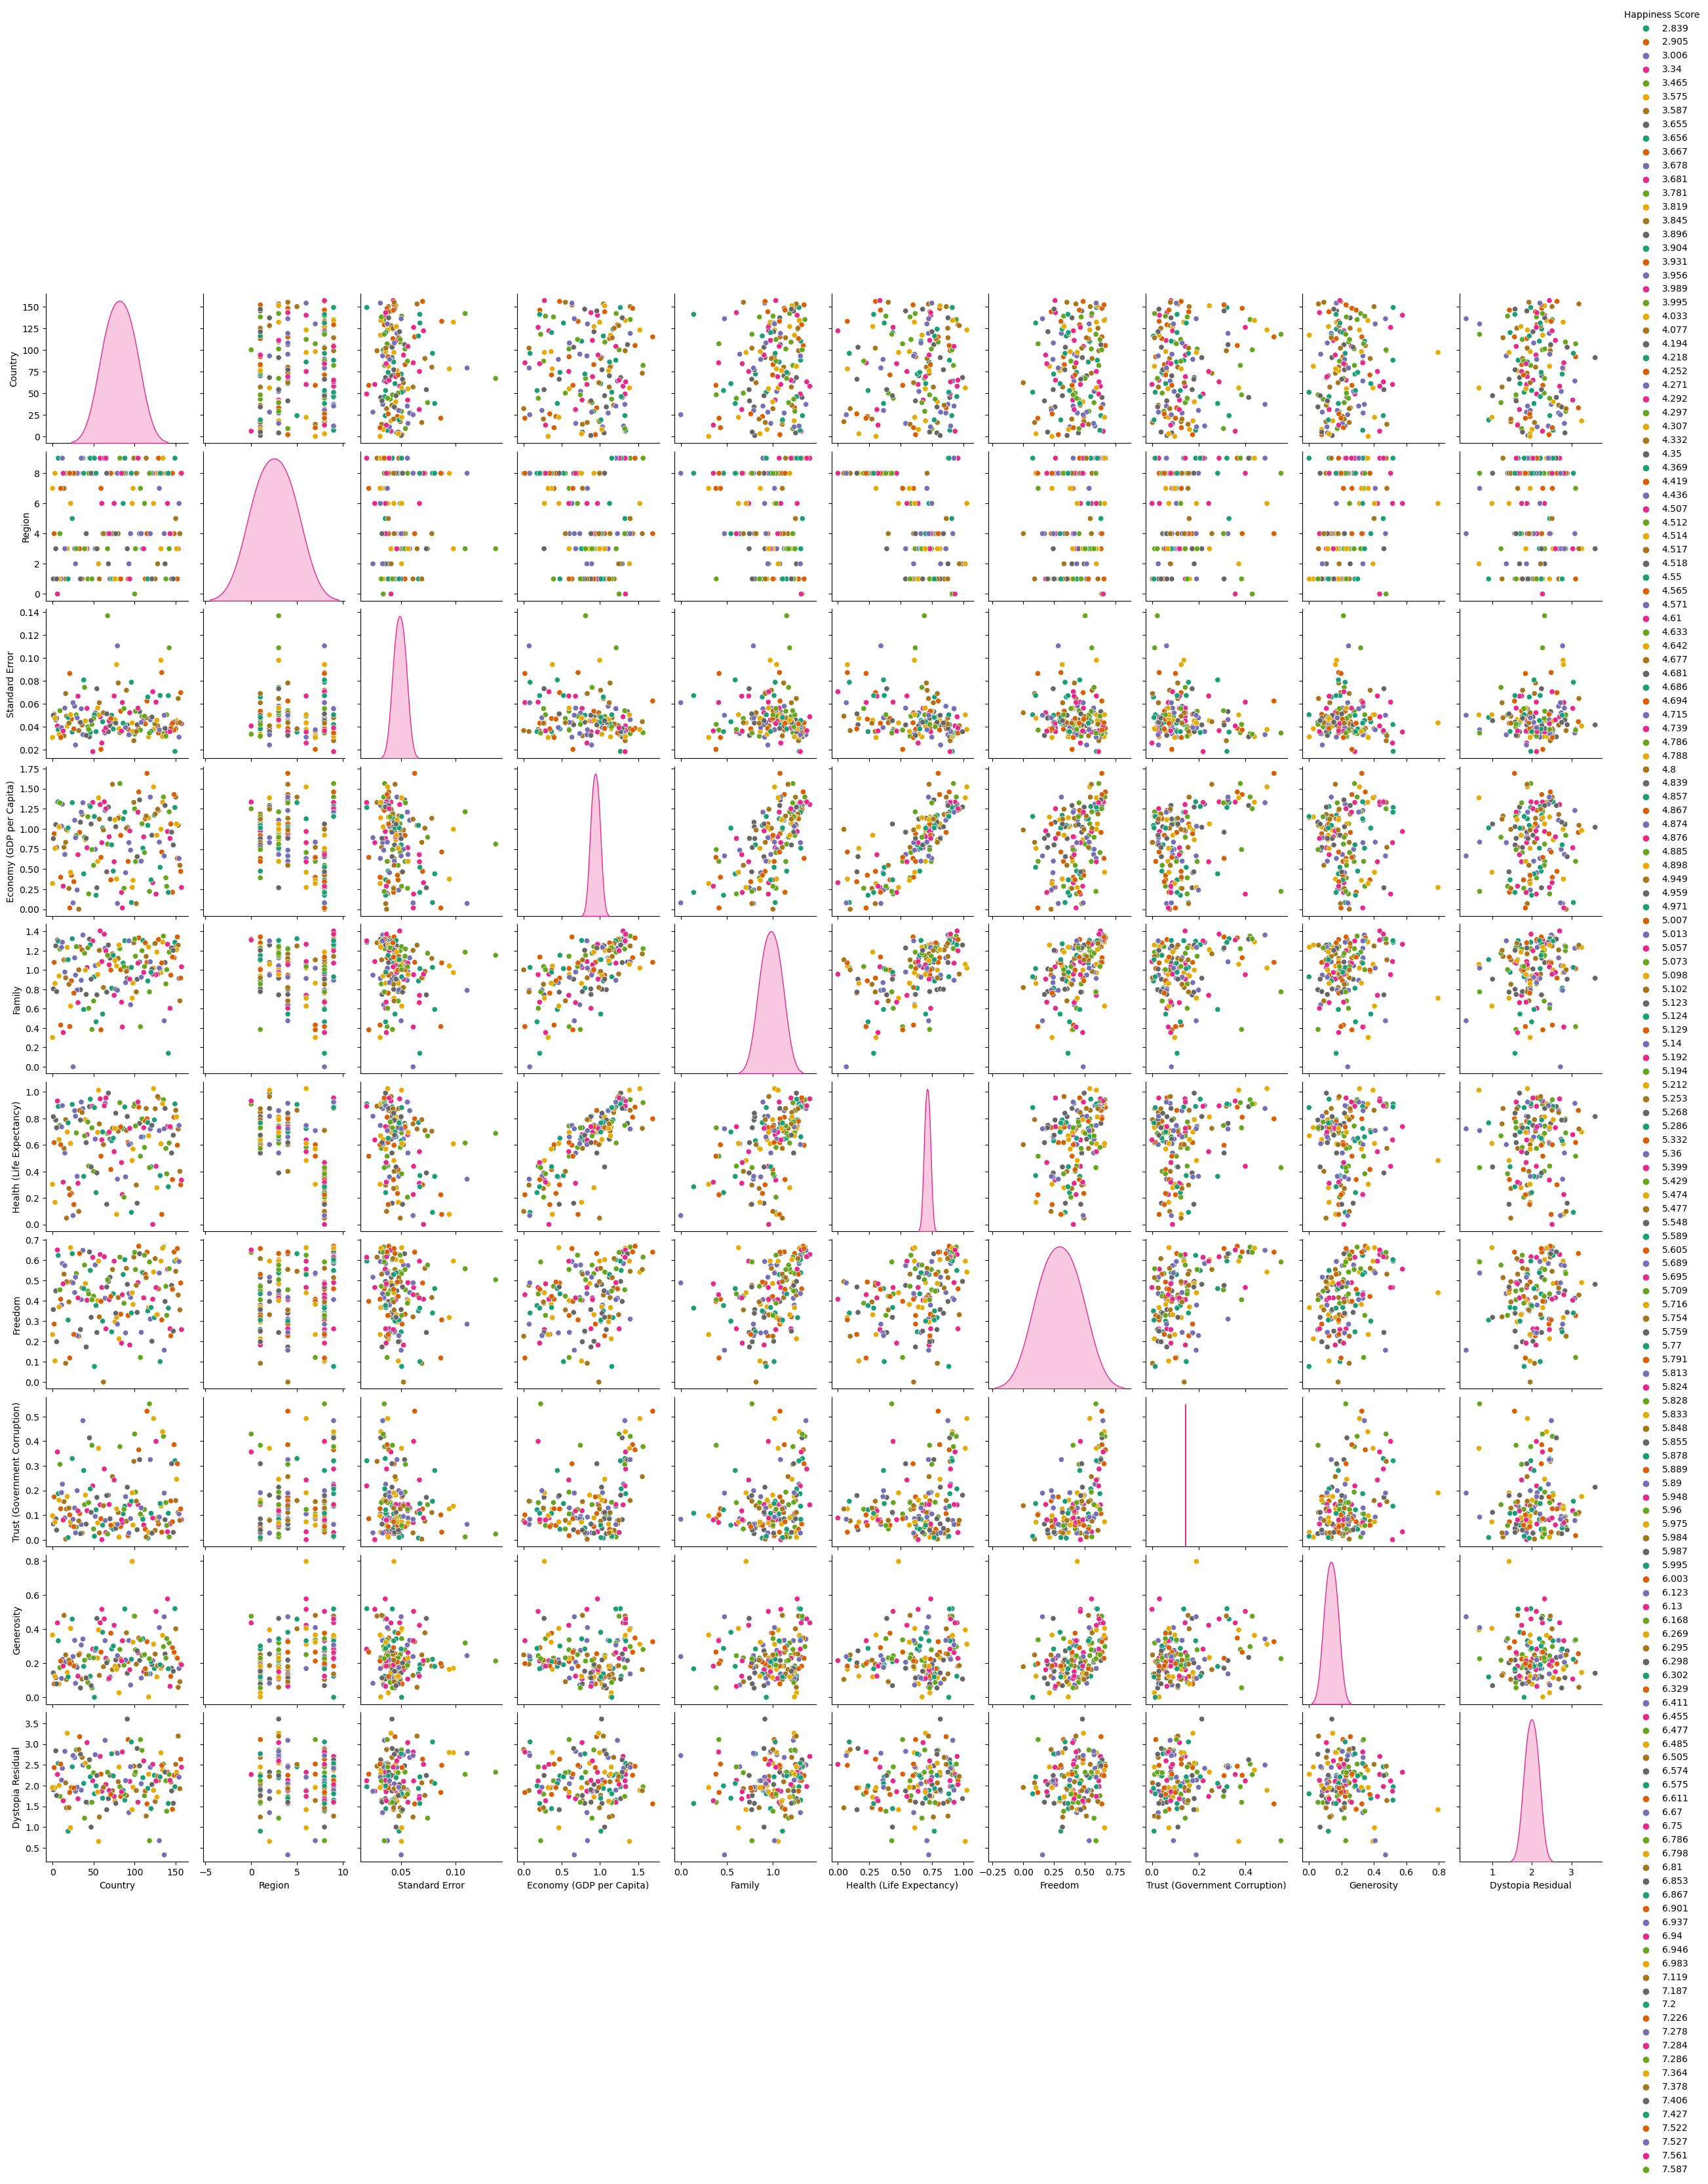

In [623]:
sns.pairplot(df,hue='Happiness Score',palette='Dark2')
plt.show()

This is the pairplot in comparesion between happiness score and rest of the columns.

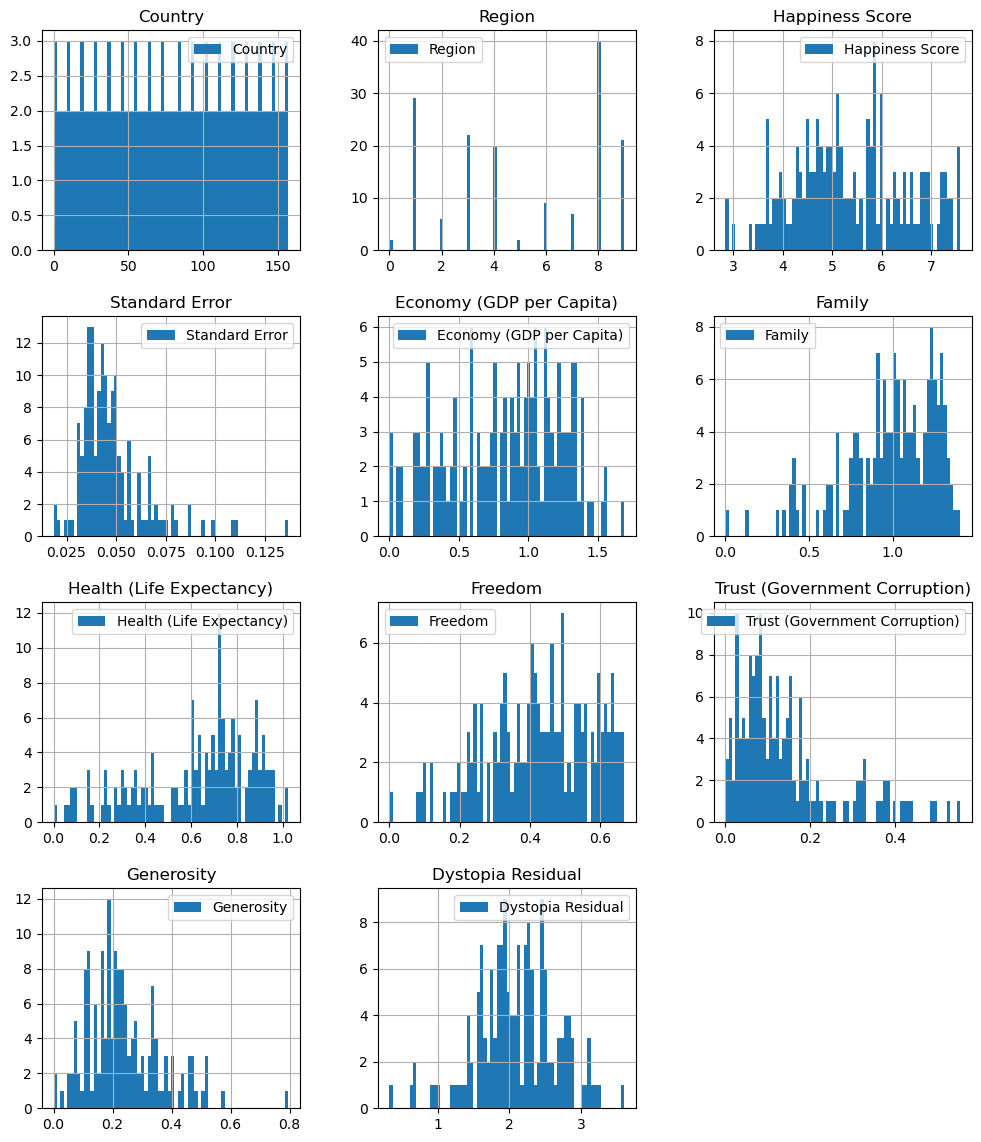

In [624]:
df.hist(bins=70, figsize=(12,14),legend=True)
plt.show()

visualization of columns with histogram. showing the normal distribution of data.

Country                             Axes(0.125,0.807358;0.352273x0.0726415)
Region                           Axes(0.547727,0.807358;0.352273x0.0726415)
Happiness Score                     Axes(0.125,0.720189;0.352273x0.0726415)
Standard Error                   Axes(0.547727,0.720189;0.352273x0.0726415)
Economy (GDP per Capita)            Axes(0.125,0.633019;0.352273x0.0726415)
Family                           Axes(0.547727,0.633019;0.352273x0.0726415)
Health (Life Expectancy)            Axes(0.125,0.545849;0.352273x0.0726415)
Freedom                          Axes(0.547727,0.545849;0.352273x0.0726415)
Trust (Government Corruption)       Axes(0.125,0.458679;0.352273x0.0726415)
Generosity                       Axes(0.547727,0.458679;0.352273x0.0726415)
Dystopia Residual                   Axes(0.125,0.371509;0.352273x0.0726415)
dtype: object

<Figure size 2000x2000 with 0 Axes>

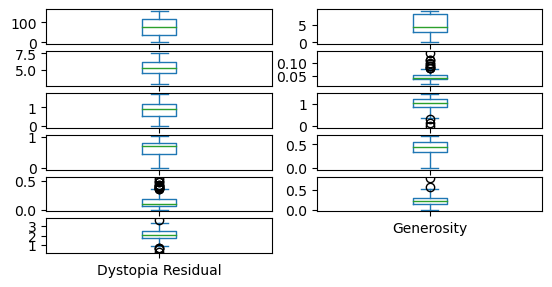

In [625]:
#checking for outliers
fig=plt.figure(figsize=(20,20))
df.plot(kind='box',subplots=True,layout=(9,2))

We can see that there are outliers present in the columns

In [626]:
#removing outliers
out=df[['Standard Error','Family','Trust (Government Corruption)','Generosity']]
z=np.abs(zscore(out))
z

,Standard Error,Family,Trust (Government Corruption),Generosity
0,0.805926,1.320281,2.309652,0.471040
1,0.055889,1.514458,0.016480,1.575856
2,0.854487,1.361054,2.842774,0.824293
3,0.531526,1.251922,1.852081,0.868638
4,0.722845,1.221204,1.555725,1.748563
...,...,...,...,...
153,0.774917,0.800520,3.413922,0.087228
154,0.662582,2.346860,0.529210,0.433117
155,0.132534,1.901086,0.381419,1.856891
156,2.263962,2.118467,0.357715,0.316950


In [627]:
np.where(z>3)

(array([ 27,  40,  64, 115, 128, 147, 153, 157], dtype=int64),
 array([2, 0, 0, 0, 3, 1, 2, 1], dtype=int64))

In [628]:
df1=df[(z<3).all(axis=1)]
df1.shape

(150, 11)

After removing outliers there are 150 rows and 11 columns.

In [629]:
#checking skewness
df1.skew()

Country                          0.036418
Region                          -0.090245
Happiness Score                  0.138125
Standard Error                   1.240644
Economy (GDP per Capita)        -0.381407
Family                          -0.798605
Health (Life Expectancy)        -0.755919
Freedom                         -0.391806
Trust (Government Corruption)    1.266162
Generosity                       0.644088
Dystopia Residual               -0.195486
dtype: float64

In [630]:
#distributing the data
x=df1.iloc[:,0:-1]

In [631]:
y=df1.iloc[:,-1]

In [632]:
#seperating independent and target variable
x=df1.drop('Happiness Score',axis=1)
y=df1['Happiness Score']
print('feature dimension',x.shape)
print('label dimension',y.shape)

feature dimension (150, 10)
label dimension (150,)


In [633]:
#scaling of data
st=StandardScaler()
x=st.fit_transform(x)
x

array([[ 1.25692472,  1.30301762, -0.87133141, ...,  2.47612718,
         0.52761999,  0.75345303],
       [-0.42509133,  1.30301762,  0.18437469, ...,  0.00639417,
         1.68364541,  1.09401985],
       [-0.88382297,  1.30301762, -0.9308179 , ...,  3.04216127,
         0.89724652,  0.7067111 ],
       ...,
       [-1.40808772,  0.97117952, -0.69573874, ..., -0.53798883,
        -0.41844497, -0.87734978],
       [ 1.27876908, -0.3561729 ,  0.27826301, ...,  0.42885667,
         1.97770607, -3.28398751],
       [-1.2333328 ,  0.97117952,  2.8892184 , ..., -0.35590669,
        -0.29689327, -0.50891119]])

# Model building

In [634]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.linear_model import Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor as KNN

In [635]:
maxAccu=0
maxRs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    Rf=RandomForestRegressor()
    Rf.fit(x_train,y_train)
    pre=Rf.predict(x_test)
    acc=r2_score(y_test,pre)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print('Best accuracy',maxAccu,'at random state',maxRs)        
    

Best accuracy 0.9561101950490054 at random state 117


In [636]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRs)

In [637]:
#Ridge
rd=Ridge()
rd.fit(x_train,y_train)
pre=rd.predict(x_test)
pred=rd.predict(x_train)
print("R2 score on train data:",r2_score(y_train,pred))
print("R2 score :",r2_score(y_test,pre)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pre))
print('Mean square error:',mean_squared_error(y_test,pre))
print('Root mean square error:',np.sqrt(mean_squared_error(y_test,pre)))

R2 score on train data: 0.9999638202666079
R2 score : 99.99704338764532
Mean absolute error: 0.005393636264097287
Mean square error: 4.097470003418707e-05
Root mean square error: 0.0064011483371491295


In [638]:
#support vector regression
svr=SVR()
svr.fit(x_train,y_train)
pre=svr.predict(x_test)
pred=svr.predict(x_train)
print(r2_score(y_train,pred))
print(r2_score(y_test,pre)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pre))
print('Mean square error:',mean_squared_error(y_test,pre))
print('Root mean square error:',np.sqrt(mean_squared_error(y_test,pre)))

0.9775567936764578
96.00436564411574
Mean absolute error: 0.1768741581282374
Mean square error: 0.05537415783297285
Root mean square error: 0.2353171430919831


In [639]:
#Randomforest
ra=RandomForestRegressor()
ra.fit(x_train,y_train)
pre=ra.predict(x_test)
pred=ra.predict(x_train)
print(r2_score(y_train,pred))
print(r2_score(y_test,pre)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pre))
print('Mean square error:',mean_squared_error(y_test,pre))
print('Root mean square error:',np.sqrt(mean_squared_error(y_test,pre)))

0.9818797706437655
94.36019359367833
Mean absolute error: 0.22028933333333292
Mean square error: 0.07816018741333321
Root mean square error: 0.27957143525999434


In [640]:
#KNN
knn=KNN()
knn.fit(x_train,y_train)
pre=knn.predict(x_test)
pred=knn.predict(x_train)
print(r2_score(y_train,pred))
print(r2_score(y_test,pre)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pre))
print('Mean square error:',mean_squared_error(y_test,pre))
print('Root mean square error:',np.sqrt(mean_squared_error(y_test,pre)))

0.8870482043572058
92.78242050710078
Mean absolute error: 0.2616444444444444
Mean square error: 0.10002601599999998
Root mean square error: 0.31626889824957494


In [641]:
#Lasso
las=Lasso()
las.fit(x_train,y_train)
pre=las.predict(x_test)
pred=las.predict(x_train)
print(r2_score(y_train,pred))
print(r2_score(y_test,pre)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pre))
print('Mean square error:',mean_squared_error(y_test,pre))
print('Root mean square error:',np.sqrt(mean_squared_error(y_test,pre)))

0.0
-0.7868480503114617
Mean absolute error: 1.0385853968253966
Mean square error: 1.3967711593046108
Root mean square error: 1.1818507347819398


In [642]:
#Extratrees regressor
ex=ExtraTreesRegressor()
ex.fit(x_train,y_train)
pre=ex.predict(x_test)
pred=ex.predict(x_train)
print(r2_score(y_train,pred))
print(r2_score(y_test,pre)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pre))
print('Mean square error:',mean_squared_error(y_test,pre))
print('Root mean square error:',np.sqrt(mean_squared_error(y_test,pre)))

1.0
96.65817022681422
Mean absolute error: 0.1691760000000004
Mean square error: 0.04631329917333331
Root mean square error: 0.21520524894466053


In [643]:
#Linear regression
lr=LinearRegression()
lr.fit(x_train,y_train)
pre=lr.predict(x_test)
pred=lr.predict(x_train)
print(r2_score(y_train,pred))
print(r2_score(y_test,pre)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pre))
print('Mean square error:',mean_squared_error(y_test,pre))
print('Root mean square error:',np.sqrt(mean_squared_error(y_test,pre)))

0.999999937545799
99.99999417464721
Mean absolute error: 0.00024300376882659217
Mean square error: 8.073161257366326e-08
Root mean square error: 0.00028413308954372644


# Cross validation

In [644]:
# Cv score for Ridge
score= cross_val_score(rd,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('difference between R2score and cross validation',(r2_score(y_test,pre)-score.mean())*100)

[0.99405867 0.99959435 0.99944804 0.99919318 0.99793722]
0.998046290992205
difference between R2score and cross validation 0.19536507542671222


In [645]:
# Cv score for support vector
score= cross_val_score(svr,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('difference between R2score and cross validation',(r2_score(y_test,pre)-score.mean())*100)

[-12.58136788   0.10102092   0.7773399   -1.13648386  -5.74486891]
-3.7168719687388276
difference between R2score and cross validation 471.68719104853


In [646]:
# Cv score for Random forest
score= cross_val_score(ra,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('difference between R2score and cross validation',(r2_score(y_test,pre)-score.mean())*100)

[-8.19315    -1.41348292 -1.3521407  -2.31921477 -5.99135134]
-3.8538679487367746
difference between R2score and cross validation 485.38678904832466


In [647]:
# Cv score for KNN
score= cross_val_score(knn,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('difference between R2score and cross validation',(r2_score(y_test,pre)-score.mean())*100)

[-10.20571042  -2.54149078  -2.91159725  -9.00543611  -5.1180602 ]
-5.956458952391946
difference between R2score and cross validation 695.6458894138418


In [648]:
# Cv score for lasso
score= cross_val_score(las,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('difference between R2score and cross validation',(r2_score(y_test,pre)-score.mean())*100)

[-43.06259059 -11.60987487  -0.1909827  -31.15501241 -24.89204709]
-22.18210153139399
difference between R2score and cross validation 2318.2101473140465


In [649]:
# Cv score for Extatrees regressor
score= cross_val_score(ex,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('difference between R2score and cross validation',(r2_score(y_test,pre)-score.mean())*100)

[-7.7437381  -0.07992547 -1.23722061 -1.24210248 -5.42776481]
-3.146150295707027
difference between R2score and cross validation 414.6150237453499


In [650]:
# Cv score for Linear regression
score= cross_val_score(lr,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('difference between R2score and cross validation',(r2_score(y_test,pre)-score.mean())*100)

[0.9999995  0.99999862 0.99999832 0.99999528 0.99999935]
0.9999982136533421
difference between R2score and cross validation 0.00017280931300378555


Linear regression is our best model as the difference between R2 score and cross validation score is least

# Setting Paramaters

In [651]:
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [652]:
para={'fit_intercept':[True],
      'copy_X':[True],
     'n_jobs':['int',None],
     'positive':[False]}
lr_cv=GridSearchCV(lr,para,cv=5)
lr_cv.fit(x_train,y_train)
print(lr_cv.best_params_)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}


In [653]:
lr_new=LinearRegression(copy_X=True,fit_intercept=True,n_jobs=None,positive=False)
lr_new.fit(x_train,y_train)
y_pred_new=lr_new.predict(x_test)
print(metrics.r2_score(y_test,y_pred_new))

0.9999999417464721


In [654]:
lr_new.fit(x_train,y_train)
pre=lr_new.predict(x_test)
print('R2 score:',r2_score(y_test,pre))
print('mean absolute error:',mean_absolute_error(y_test,pre))
print('mean square error;',mean_squared_error(y_test,pre))
print('root mean squre error:',np.sqrt(mean_squared_error(y_test,pre)))

R2 score: 0.9999999417464721
mean absolute error: 0.00024300376882659217
mean square error; 8.073161257366326e-08
root mean squre error: 0.00028413308954372644


In [655]:
import joblib
import pickle
filename="World Happiness.pkl"
pickle.dump(lr_new,open(filename,'wb'))

In [656]:
load_m=pickle.load(open('World Happiness.pkl','rb'))

In [657]:
result=load_m.score(x_test,y_test)
print(result*100)

99.99999417464721


In [658]:
con=pd.DataFrame([load_m.predict(x_test)[:],y_test[:]],index=['predicted','orginal'])
con

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
predicted,4.270644,4.251987,5.812591,7.378132,3.955592,3.680781,6.298167,4.21858,4.516995,6.302464,...,6.75015,5.695291,7.199914,4.799656,3.655877,5.824082,5.124198,4.677387,6.122808,4.435504
orginal,4.271000,4.252000,5.813000,7.378000,3.956000,3.681000,6.298000,4.21800,4.517000,6.302000,...,6.75000,5.695000,7.200000,4.800000,3.656000,5.824000,5.124000,4.677000,6.123000,4.436000
